In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#one hot encode the labels for MSE
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)

# normalize pixel values so they are between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

#create the structure of the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # images are 28 x 28 pixels
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # nn can output 10 values (one for each digit)
])

#compile the model (set it up for training)
model.compile(
    optimizer='adam', 
    loss='mse', # mean squared error loss function
    metrics=['accuracy']
)

#train the model
model.fit(
    x_train,
    y_train_oh,
    epochs=5, # number of times the model will go through the entire training dataset
    batch_size=32  # number of training samples go through the model before the weights & biases are updated
)

test_loss, test_acc = model.evaluate(x_test, y_test_oh)
print("Test accuracy:", test_acc)


Epoch 1/5


/Users/dhirajpatel/Desktop/mnist_nn/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 604us/step - accuracy: 0.9216 - loss: 0.0121
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.9624 - loss: 0.0059
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.9736 - loss: 0.0043
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.9784 - loss: 0.0035
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 479us/step - accuracy: 0.9826 - loss: 0.0029
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 305us/step - accuracy: 0.9716 - loss: 0.0044
Test accuracy: 0.9715999960899353


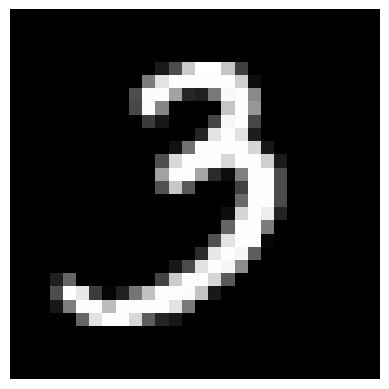

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted digit: 3
Actual digit: 3


In [31]:
#random image of digit from test set
index = np.random.randint(0, len(x_test))

image = x_test[index]
true_label = y_test[index]

# display image
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# make prediction
prediction = model.predict(image.reshape(1, 28, 28))
predicted_label = np.argmax(prediction)

print("Predicted digit:", predicted_label)
print("Actual digit:", true_label)